Name: Peishan Huang Github Username: peishanhuang USC ID: 7777529178

In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, confusion_matrix
import statistics
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import NearestNeighbors

1. Supervised, Semi-Supervised, and Unsupervised Learning
(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [87]:
accuracy_train_30=[]
precision_train_30=[]
recall_train_30=[]
f1_train_30=[]
auc_train_30=[]

accuracy_test_30=[]
precision_test_30=[]
recall_test_30=[]
f1_test_30=[]
auc_test_30=[]

warnings.filterwarnings('ignore')

for m in range(30):
    df=pd.read_csv('../data/wdbc.csv',header=None)
    df['label']=df.iloc[:,1].map({'M':1,'B':0})
    df=df.drop(labels=[0,1],axis=1)
    
    negative_class_20=df[(df['label']==0)].sample(frac=0.2)
    positive_class_20=df[(df['label']==1)].sample(frac=0.2)
    testset=pd.concat([negative_class_20,positive_class_20])
    trainset=df.drop(testset.index)
    X_train=trainset.iloc[:,:-1]
    y_train=trainset.iloc[:,-1]
    X_train=preprocessing.normalize(X_train)
    X_test=testset.iloc[:,:-1]
    X_test=preprocessing.normalize(X_test)
    y_test=testset.iloc[:,-1]
    
    #model predict on testset 
    param_grid=[{'C':[1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4]}]
    svc=LinearSVC(penalty='l1',dual=False)
    model=GridSearchCV(svc,param_grid,cv=5).fit(X_train,y_train)
    y_pred_te=model.predict(X_test)
    accuracy_test_30.append(accuracy_score(y_test,y_pred_te))
    precision_test_30.append(precision_score(y_test,y_pred_te))
    recall_test_30.append(recall_score(y_test,y_pred_te))
    f1_test_30.append(f1_score(y_test,y_pred_te))
    fpr_te, tpr_te, thresholds=roc_curve(y_test,y_pred_te)
    auc_test_30.append(auc(fpr_te, tpr_te))

    #model predict on trainset
    param_grid=[{'C':[1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4]}]
    svc=LinearSVC(penalty='l1',dual=False)
    model=GridSearchCV(svc,param_grid,cv=5).fit(X_train,y_train)
    y_pred_tr=model.predict(X_train)
    accuracy_train_30.append(accuracy_score(y_train,y_pred_tr))
    precision_train_30.append(precision_score(y_train,y_pred_tr))
    recall_train_30.append(recall_score(y_train,y_pred_tr))
    f1_train_30.append(f1_score(y_train,y_pred_tr))
    fpr_tr, tpr_tr, thresholds=roc_curve(y_train,y_pred_tr)
    auc_train_30.append(auc(fpr_tr, tpr_tr))

#after running M=30 times
average_accuracy_test_30=statistics.mean(accuracy_test_30)
average_precision_test_30=statistics.mean(precision_test_30)
average_recall_test_30=statistics.mean(recall_test_30)
average_f1_test_30=statistics.mean(f1_test_30)
average_auc_test_30=statistics.mean(auc_test_30)
print(f'The average accuracy score on testset is {average_accuracy_test_30}\nThe average precision score on testset is {average_precision_test_30}\nThe average recall score on testset is {average_recall_test_30}\nThe average f1-score on testset is {average_f1_test_30}\nThe average AUC score on testset is {average_auc_test_30}')

average_accuracy_train_30=statistics.mean(accuracy_train_30)
average_precision_train_30=statistics.mean(precision_train_30)
average_recall_train_30=statistics.mean(recall_train_30)
average_f1_train_30=statistics.mean(f1_train_30)
average_auc_train_30=statistics.mean(auc_train_30)

print(f'The average accuracy score on trainset is {average_accuracy_train_30}\nThe average precision score on trainset is {average_precision_train_30}\nThe average recall score on trainset is {average_recall_train_30}\nThe average f1-score on trainset is {average_f1_train_30}\nThe average AUC score on trainset is {average_auc_train_30}')


The average accuracy score on testset is 0.9660766961651918
The average precision score on testset is 0.9616950908758968
The average recall score on testset is 0.9476190476190476
The average f1-score on testset is 0.9542010020842983
The average AUC score on testset is 0.9623071763916835
The average accuracy score on trainset is 0.9827485380116959
The average precision score on trainset is 0.9852738921532659
The average recall score on trainset is 0.9682352941176471
The average f1-score on trainset is 0.9766628271577814
The average AUC score on trainset is 0.9798052927464692


In [85]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_te)
print('The confusion_matrix_on testset\n',confusion_matrix_test)
confusion_matrix_train=confusion_matrix(y_train,y_pred_tr)
print('The confusion_matrix_on trainset\n',confusion_matrix_train)

The confusion_matrix_on testset
 [[70  1]
 [ 1 41]]
The confusion_matrix_on trainset
 [[283   3]
 [  6 164]]


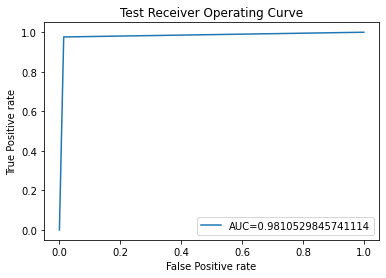

In [98]:
#plot the ROC on testset
plt.plot(fpr_te, tpr_te,label= 'AUC='+str(auc(fpr_te, tpr_te)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.title('Test Receiver Operating Curve')
plt.show()

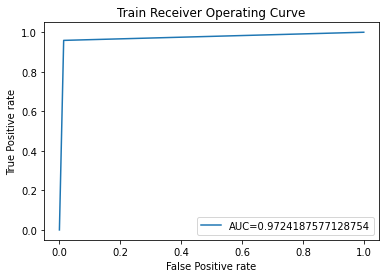

In [97]:
#plot the ROC on trainset
plt.plot(fpr_tr, tpr_tr, label= 'AUC='+str(auc(fpr_tr, tpr_tr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.title('Train Receiver Operating Curve')
plt.show()


ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.
A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.
B. Findtheunlabeleddatapointthatisthefarthesttothedecisionboundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [105]:
accuracy_train_30=[]
precision_train_30=[]
recall_train_30=[]
f1_train_30=[]
auc_train_30=[]

accuracy_test_30=[]
precision_test_30=[]
recall_test_30=[]
f1_test_30=[]
auc_test_30=[]

warnings.filterwarnings('ignore')

for m in range(30):
    df=pd.read_csv('../data/wdbc.csv',header=None)
    df['label']=df.iloc[:,1].map({'M':1,'B':0})
    df=df.drop(labels=[0,1],axis=1)
    
    negative_class_20=df[(df['label']==0)].sample(frac=0.2)
    positive_class_20=df[(df['label']==1)].sample(frac=0.2)
    testset=pd.concat([negative_class_20,positive_class_20])
    trainset=df.drop(testset.index)
    X_test=testset.iloc[:,:-1]
    X_test=preprocessing.normalize(X_test)
    y_test=testset.iloc[:,-1]
    label_data_0=trainset[(trainset['label']==0)].sample(frac=0.5)
    label_data_1=trainset[(trainset['label']==1)].sample(frac=0.5)
    label_data=pd.concat([label_data_0,label_data_1])
    
    unlabel_data=trainset.drop(label_data.index)
    unlabel_data_X=unlabel_data.reset_index(drop=True)
    unlabel_data_y=unlabel_data['label']
    unlabel_data_X=unlabel_data.drop(labels='label',axis=1)
    unlabel_data_X=preprocessing.normalize(unlabel_data_X)

    label_data_X=label_data.iloc[:,:-1]
    label_data_X=preprocessing.normalize(label_data_X)
    label_data_X=pd.DataFrame(label_data_X)
    label_data_y=label_data.iloc[:,-1]
    label_data_y=label_data_y.reset_index(drop=True)

    for i in range(len(unlabel_data_X)):
        param_grid=[{'C':[1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4]}]
        svc=LinearSVC(penalty='l1',dual=False)
        model=GridSearchCV(svc,param_grid,cv=5).fit(label_data_X,label_data_y)
        max_index=np.argmax(model.decision_function(unlabel_data_X))
        unlabel_data_X=pd.DataFrame(unlabel_data_X)
        max_value=pd.DataFrame(unlabel_data_X.iloc[max_index,:]).T ###index对应的features
        y_pred=model.predict(max_value)
        y_pred=pd.DataFrame(y_pred)
        label_data_y=pd.concat([label_data_y,y_pred],ignore_index=True)
        label_data_X=label_data_X.append(max_value)
        unlabel_data_X=unlabel_data_X.drop(index=max_index,axis=0)
        unlabel_data_X=unlabel_data_X.reset_index(drop=True)

    #model predict on testset
    y_pred_te=model.predict(X_test)
    accuracy_test_30.append(accuracy_score(y_test,y_pred_te))
    precision_test_30.append(precision_score(y_test,y_pred_te))
    recall_test_30.append(recall_score(y_test,y_pred_te))
    f1_test_30.append(f1_score(y_test,y_pred_te))
    fpr_te, tpr_te, thresholds=roc_curve(y_test,y_pred_te)
    auc_test_30.append(auc(fpr_te, tpr_te))
    
    #model predict on trainset
    y_pred_tr=model.predict(label_data_X)
    accuracy_train_30.append(accuracy_score(label_data_y,y_pred_tr))
    precision_train_30.append(precision_score(label_data_y,y_pred_tr))
    recall_train_30.append(recall_score(label_data_y,y_pred_tr))
    f1_train_30.append(f1_score(label_data_y,y_pred_tr))
    fpr_tr, tpr_tr, thresholds=roc_curve(label_data_y,y_pred_tr)
    auc_train_30.append(auc(fpr_tr, tpr_tr))
    
#after running M=30 times
average_accuracy_test_30=statistics.mean(accuracy_test_30)
average_precision_test_30=statistics.mean(precision_test_30)
average_recall_test_30=statistics.mean(recall_test_30)
average_f1_test_30=statistics.mean(f1_test_30)
average_auc_test_30=statistics.mean(auc_test_30)

print(f'The average accuracy score on testset is {average_accuracy_test_30}\nThe average precision score on testset is {average_precision_test_30}\nThe average recall score on testset is {average_recall_test_30}\nThe average f1-score on testset is {average_f1_test_30}\nThe average AUC score on testset is {average_auc_test_30}')

average_accuracy_train_30=statistics.mean(accuracy_train_30)
average_precision_train_30=statistics.mean(precision_train_30)
average_recall_train_30=statistics.mean(recall_train_30)
average_f1_train_30=statistics.mean(f1_train_30)
average_auc_train_30=statistics.mean(auc_train_30)

print(f'The average accuracy score on trainset is {average_accuracy_train_30}\nThe average precision score on trainset is {average_precision_train_30}\nThe average recall score on trainset is {average_recall_train_30}\nThe average f1-score on trainset is {average_f1_train_30}\nThe average AUC score on trainset is {average_auc_train_30}')


The average accuracy score on testset is 0.9530973451327434
The average precision score on testset is 0.9362045428804473
The average recall score on testset is 0.9396825396825397
The average f1-score on testset is 0.937256765540034
The average AUC score on testset is 0.9503577017661525
The average accuracy score on trainset is 0.9882309941520467
The average precision score on trainset is 0.9866510155644233
The average recall score on trainset is 0.9825916793831956
The average f1-score on trainset is 0.9846001171496666
The average AUC score on trainset is 0.9871399415997849


In [106]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_te)
print('The confusion_matrix on testset is\n', confusion_matrix_test)
confusion_matrix_train=confusion_matrix(label_data_y,y_pred_tr)
print('The confusion_matrix on trainset is\n', confusion_matrix_train)

The confusion_matrix on testset is
 [[71  0]
 [ 1 41]]
The confusion_matrix on trainset is
 [[282   1]
 [  3 170]]


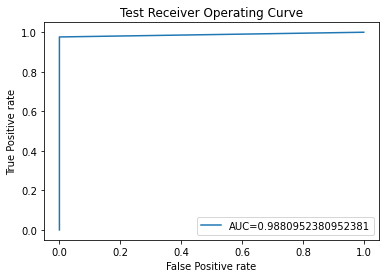

In [107]:
#plot the ROC on testset
plt.plot(fpr_te, tpr_te, label= 'AUC='+str(auc(fpr_te, tpr_te)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.title('Test Receiver Operating Curve')
plt.show()

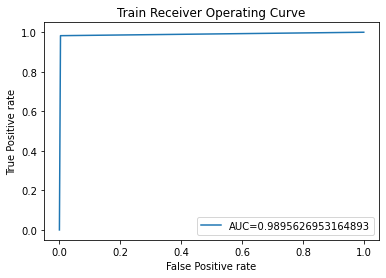

In [108]:
#plot the ROC on trainset
plt.plot(fpr_tr, tpr_tr, label='AUC='+str(auc(fpr_tr, tpr_tr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.title('Train Receiver Operating Curve')
plt.show()

iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.
A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

1. run kmeans multiple times
2. use a better initialization algorithm. The KMeans++ algorithm is a simple and quite effective initialization strategy. It initializes each cluster to 1 of n of the data points, and the probability of being assigned to a point is proportional to the distances of the previous cluster(s). This makes it likely that the clusters are going to be spread out and likely near the optimal centroids. This also will significantly decrease the number of iterations required for KMeans to converge.

B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1
C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

In [154]:
accuracy_train_30=[]
precision_train_30=[]
recall_train_30=[]
f1_train_30=[]
auc_train_30=[]

accuracy_test_30=[]
precision_test_30=[]
recall_test_30=[]
f1_test_30=[]
auc_test_30=[]

warnings.filterwarnings('ignore')

for i in range(30):
    df=pd.read_csv('../data/wdbc.csv',header=None)
    df['label']=df.iloc[:,1].map({'M':1,'B':0})
    df=df.drop(labels=[0,1],axis=1)
    
    negative_class_20=df[(df['label']==0)].sample(frac=0.2)
    positive_class_20=df[(df['label']==1)].sample(frac=0.2)
    testset=pd.concat([negative_class_20,positive_class_20])
    testset=testset.reset_index(drop=True)
    trainset=df.drop(testset.index)
    trainset=trainset.reset_index(drop=True)
    X_train=trainset.iloc[:,:-1]
    y_train=trainset.iloc[:,-1]
    X_train=preprocessing.normalize(X_train)
    X_test=testset.iloc[:,:-1]
    X_test=preprocessing.normalize(X_test)
    y_test=testset.iloc[:,-1]
    
    model=KMeans(n_clusters=2, n_init=10, init='k-means++').fit(X_train)
    #print(model.cluster_centers_)
    #find the closest 30 data points to these two centers
    NN=NearestNeighbors(n_neighbors=30, algorithm='ball_tree').fit(X_train)
    distances, indices = NN.kneighbors(model.cluster_centers_)
    cluster0=y_train.loc[indices[0]]
    majority_polling_0=cluster0.value_counts()
    max_label_0=np.argmax(majority_polling_0) #label for cluster0
    cluster1=y_train.loc[indices[1]]
    majority_polling_1=cluster1.value_counts()
    max_label_1=np.argmax(majority_polling_1) #label for cluster1
    
    #model predict on trainset
    y_pred_tr=model.predict(X_train)
    #print(y_pred_tr)
    labels=[]
    for i in y_pred_tr:
        if i==0:
            label=max_label_0
            labels.append(label)
        if i==1:
            label=max_label_1
            labels.append(label)
    accuracy_train_30.append(accuracy_score(y_train,labels))
    precision_train_30.append(precision_score(y_train,labels))
    recall_train_30.append(recall_score(y_train,labels))
    f1_train_30.append(f1_score(y_train,labels))
    fpr_tr, tpr_tr, thresholds = roc_curve(y_train,labels)
    auc_train_30.append(auc(fpr_tr, tpr_tr))
    
    #model predict on testset
    y_pred_te=model.predict(X_test)
    accuracy_test_30.append(accuracy_score(y_test,y_pred_te))
    precision_test_30.append(precision_score(y_test,y_pred_te))
    recall_test_30.append(recall_score(y_test,y_pred_te))
    f1_test_30.append(f1_score(y_test,y_pred_te))
    fpr_te, tpr_te, thresholds = roc_curve(y_test,y_pred_te)
    auc_test_30.append(auc(fpr_te, tpr_te))

#after running M=30 times
average_accuracy_train_30=statistics.mean(accuracy_train_30)
average_precision_train_30=statistics.mean(precision_train_30)
average_recall_train_30=statistics.mean(recall_train_30)
average_f1_train_30=statistics.mean(f1_train_30)
average_auc_train_30=statistics.mean(auc_train_30)

print(f'The average accuracy score on trainset is {average_accuracy_train_30}\nThe average precision score on trainset is {average_precision_train_30}\nThe average recall score on trainset is {average_recall_train_30}\nThe average f1-score on trainset is {average_f1_train_30}\nThe average AUC score on trainset is {average_auc_train_30}')

average_accuracy_test_30=statistics.mean(accuracy_test_30)
average_precision_test_30=statistics.mean(precision_test_30)
average_recall_test_30=statistics.mean(recall_test_30)
average_f1_test_30=statistics.mean(f1_test_30)
average_auc_test_30=statistics.mean(auc_test_30)

print(f'The average accuracy score on testset is {average_accuracy_test_30}\nThe average precision score on testset is {average_precision_test_30}\nThe average recall score on testset is {average_recall_test_30}\nThe average f1-score on testset is {average_f1_test_30}\nThe average AUC score on testset is {average_auc_test_30}')   
    

The average accuracy score on trainset is 0.6842105263157895
The average precision score on trainset is 0.0
The average recall score on trainset is 0.0
The average f1-score on trainset is 0.0
The average AUC score on trainset is 0.5
The average accuracy score on testset is 0.5029498525073747
The average precision score on testset is 0.5342114198571652
The average recall score on testset is 0.5031746031746032
The average f1-score on testset is 0.50631869511309
The average AUC score on testset is 0.5029957522915269


In [156]:
confusion_matrix_train=confusion_matrix(y_train,labels)
print('The confusion_matrix on trainset is\n', confusion_matrix_train)
confusion_matrix_test=confusion_matrix(y_test,y_pred_te)
print('The confusion_matrix on testset is\n', confusion_matrix_test)

The confusion_matrix on trainset is
 [[312   0]
 [144   0]]
The confusion_matrix on testset is
 [[70  1]
 [ 7 35]]


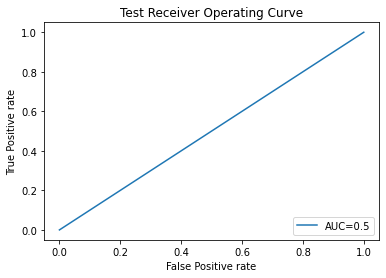

In [157]:
#plot the ROC on Trainset
plt.plot(fpr_tr, tpr_tr, label= 'AUC='+str(auc(fpr_tr, tpr_tr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.title('Train Receiver Operating Curve')
plt.show()

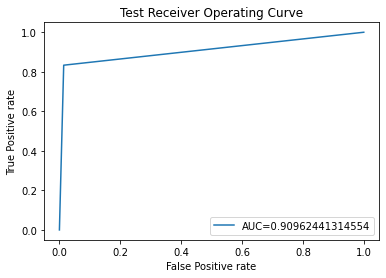

In [159]:
#plot the ROC on testset
plt.plot(fpr_te, tpr_te, label= 'AUC='+str(auc(fpr_te, tpr_te)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.title('Test Receiver Operating Curve')
plt.show()

iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [164]:
accuracy_train_30=[]
precision_train_30=[]
recall_train_30=[]
f1_train_30=[]
auc_train_30=[]

accuracy_test_30=[]
precision_test_30=[]
recall_test_30=[]
f1_test_30=[]
auc_test_30=[]

warnings.filterwarnings('ignore')

for i in range(30):
    df=pd.read_csv('../data/wdbc.csv',header=None)
    df['label']=df.iloc[:,1].map({'M':1,'B':0})
    df=df.drop(labels=[0,1],axis=1)
    
    negative_class_20=df[(df['label']==0)].sample(frac=0.2)
    positive_class_20=df[(df['label']==1)].sample(frac=0.2)
    testset=pd.concat([negative_class_20,positive_class_20])
    testset=testset.reset_index(drop=True)
    trainset=df.drop(testset.index)
    trainset=trainset.reset_index(drop=True)
    X_train=trainset.iloc[:,:-1]
    y_train=trainset.iloc[:,-1]
    X_train=preprocessing.normalize(X_train)
    X_test=testset.iloc[:,:-1]
    X_test=preprocessing.normalize(X_test)
    y_test=testset.iloc[:,-1]
    
    model=SpectralClustering(n_clusters=2, gamma=1, affinity='rbf')
    y_pred_tr=model.fit_predict(X_train)
    #model predict on trainset
    accuracy_train_30.append(accuracy_score(y_train,y_pred_tr))
    precision_train_30.append(precision_score(y_train,y_pred_tr))
    recall_train_30.append(recall_score(y_train,y_pred_tr))
    f1_train_30.append(f1_score(y_train,y_pred_tr))
    fpr_tr, tpr_tr, thresholds = roc_curve(y_train,y_pred_tr)
    auc_train_30.append(auc(fpr_tr, tpr_tr))
    #model predict on testset
    y_pred_te=model.fit_predict(X_test)
    accuracy_test_30.append(accuracy_score(y_test,y_pred_te))
    precision_test_30.append(precision_score(y_test,y_pred_te))
    recall_test_30.append(recall_score(y_test,y_pred_te))
    f1_test_30.append(f1_score(y_test,y_pred_te))
    fpr_te, tpr_te, thresholds = roc_curve(y_test,y_pred_te)
    auc_test_30.append(auc(fpr_te, tpr_te))

#after running M=30 times
average_accuracy_train_30=statistics.mean(accuracy_train_30)
average_precision_train_30=statistics.mean(precision_train_30)
average_recall_train_30=statistics.mean(recall_train_30)
average_f1_train_30=statistics.mean(f1_train_30)
average_auc_train_30=statistics.mean(auc_train_30)

print(f'The average accuracy score on trainset is {average_accuracy_train_30}\nThe average precision score on trainset is {average_precision_train_30}\nThe average recall score on trainset is {average_recall_train_30}\nThe average f1-score on trainset is {average_f1_train_30}\nThe average AUC score on trainset is {average_auc_train_30}')

average_accuracy_test_30=statistics.mean(accuracy_test_30)
average_precision_test_30=statistics.mean(precision_test_30)
average_recall_test_30=statistics.mean(recall_test_30)
average_f1_test_30=statistics.mean(f1_test_30)
average_auc_test_30=statistics.mean(auc_test_30)

print(f'The average accuracy score on testset is {average_accuracy_test_30}\nThe average precision score on testset is {average_precision_test_30}\nThe average recall score on testset is {average_recall_test_30}\nThe average f1-score on testset is {average_f1_test_30}\nThe average AUC score on testset is {average_auc_test_30}')   
    

The average accuracy score on trainset is 0.57953216374269
The average precision score on trainset is 0.58778053292433
The average recall score on trainset is 0.55
The average f1-score on trainset is 0.5528599056245416
The average AUC score on trainset is 0.5715811965811967
The average accuracy score on testset is 0.6492625368731564
The average precision score on testset is 0.6987901619299041
The average recall score on testset is 0.5785714285714285
The average f1-score on testset is 0.6194518466975972
The average AUC score on testset is 0.6348256203890007


In [165]:
confusion_matrix_train=confusion_matrix(y_train,y_pred_tr)
print('The confusion_matrix on trainset is\n', confusion_matrix_train)
confusion_matrix_test=confusion_matrix(y_test,y_pred_te)
print('The confusion_matrix on testset is\n', confusion_matrix_test)

The confusion_matrix on trainset is
 [[301  11]
 [ 36 108]]
The confusion_matrix on testset is
 [[71  0]
 [21 21]]


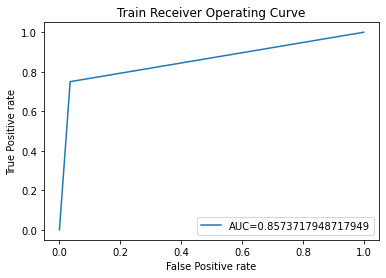

In [166]:
#plot the ROC on trainset
plt.plot(fpr_tr, tpr_tr, label='AUC='+str(auc(fpr_tr, tpr_tr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.title('Train Receiver Operating Curve')
plt.show()

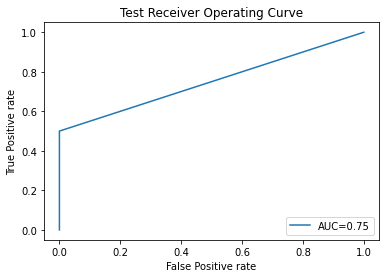

In [167]:
#plot the ROC on testset
plt.plot(fpr_te, tpr_te, label='AUC='+str(auc(fpr_te, tpr_te)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.title('Test Receiver Operating Curve')
plt.show()

v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

Comparing the above 4 methods, the average performence on supervised learning on the full dataset actually almost the same with the semi-supervised learning with half of the labeled dataset. Both of them work far better than the unsupervised learning methods, in which the spectral clustering works better than k-means clustering by having the higher average performance on testset.

2. Active Learning Using Support Vector Machines
(a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points ran- domly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.
i. 
TrainaSVMwithapoolof10randomlyselecteddatapointsfromthetraining set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [17]:
df=pd.read_csv('../data/data_banknote_authentication.txt',header=None)
testset=df.sample(n=472)
trainset=df.drop(testset.index)
testset=testset.reset_index(drop=True)
trainset=trainset.reset_index(drop=True)
X_test=testset.iloc[:,:-1]
y_test=testset.iloc[:,-1].values
X_test

,0,1,2,3
0,2.91630,10.83060,-3.34370,-4.12200
1,3.06320,-3.33150,5.13050,0.82670
2,4.93620,7.60460,-2.34290,-0.85302
3,-2.89900,-0.60424,2.60450,1.37760
4,-1.85540,-9.60350,7.77640,-0.97716
...,...,...,...,...
467,3.51520,6.82240,-0.67377,-0.46898
468,-2.88330,1.77130,0.68946,-0.46380
469,0.19081,9.12970,-3.72500,-5.82240
470,-2.54190,-0.65804,2.68420,1.19520


The average 50 test error is
 0.017065913370998102


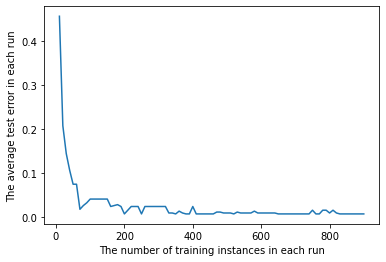

In [15]:
#passive learning
warnings.filterwarnings('ignore')

average_testerrors_50=[]

for i in range(50):
    testerrors_90=[]
    datapoints=pd.DataFrame()
    for k in range(90):
        trainsettmp = trainset
        datapoints_10=trainsettmp.sample(n=10,replace=False)
        datapoints=pd.concat([datapoints,datapoints_10])
        trainsettmp=trainsettmp.drop(datapoints_10.index)
        X_train=datapoints.iloc[:,:-1]
        y_train=datapoints.iloc[:,-1]
        param_grid=[{'C':[1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4]}]
        svc=LinearSVC(penalty='l1',dual=False)
        model=GridSearchCV(svc, param_grid, cv=5).fit(X_train,y_train)
        y_pred=model.predict(X_test)
        testerrors_90.append(1-accuracy_score(y_test,y_pred))
    average_testerrors_50.append(statistics.mean(testerrors_90))

average_50=statistics.mean(average_testerrors_50)
print('The average 50 test error is\n', average_50)

instance_numbers=[]
for r in range(1,91):
    instance_numbers.append(r*10)

plt.plot(instance_numbers,testerrors_90)
plt.xlabel('The number of training instances in each run')
plt.ylabel('The average test error in each run')
plt.show()

ii. Train a SVM with a pool of 10 randomly selected datapoints from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.
(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

The average 50 test error is
 0.02423258003766479


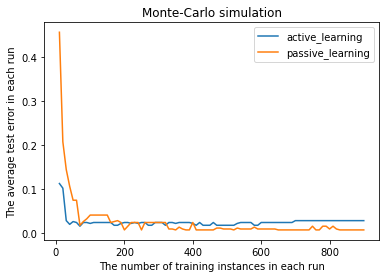

In [49]:
#active learning
warnings.filterwarnings('ignore')

average_testerrors_50=[]

for i in range(50):
    datapoints=pd.DataFrame()
    testerrors_90_active=[]
    for k in range(1):
        trainset_tmp=trainset
        datapoints_10=trainset_tmp.sample(n=10, replace=False)
        datapoints=pd.concat([datapoints,datapoints_10])
        trainset_tmp=trainset_tmp.drop(datapoints_10.index)
        trainset_tmp=trainset_tmp.reset_index(drop=True)
        X_train=datapoints.iloc[:,:-1]
        y_train=datapoints.iloc[:,-1]
        param_grid=[{'C':[1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4]}]
        svc=LinearSVC(penalty='l1',dual=False)
        model=GridSearchCV(svc, param_grid, cv=5).fit(X_train,y_train)
        y_pred=model.predict(X_test)
        testerrors_90_active.append(1-accuracy_score(y_test,y_pred))
    for k in range(1,90):
        X_tmp=trainset_tmp.iloc[:,:-1]
        distance=abs(model.decision_function(X_tmp))
        distance_df=pd.DataFrame(distance)
        
        distance_df = distance_df.sort_values(0)
        distance_df = distance_df.iloc[0:10,]
        distance_df_index = distance_df.index
        temp  =  trainset_tmp.iloc[distance_df_index,:]
        trainset_tmp= trainset_tmp.drop(index = distance_df_index)
        trainset_tmp=trainset_tmp.reset_index(drop=True)
        datapoints=pd.concat([datapoints,temp])
        
        #distance_df=distance_df.sort_values(0)
        #closest_10_datapoint=distance_df.iloc[:10,:]
        #closest_10_index=closest_10_datapoint.index
        #for i in closest_10_index:
            #closest_datapoint=trainset_tmp.loc[i]
            #datapoints=pd.concat([datapoints,closest_datapoint])
        #trainset_tmp=trainset_tmp.drop(closest_10_index)
        #trainset_tmp=trainset_tmp.reset_index(drop=True)
        
        X_train=datapoints.iloc[:,:-1]
        y_train=datapoints.iloc[:,-1]
        param_grid=[{'C':[1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4]}]
        svc=LinearSVC(penalty='l1',dual=False)
        model=GridSearchCV(svc, param_grid, cv=5).fit(X_train,y_train)
        y_pred=model.predict(X_test)
        testerrors_90_active.append(1-accuracy_score(y_test,y_pred))
    average_testerrors_50.append(statistics.mean(testerrors_90_active))

average_50=statistics.mean(average_testerrors_50)
print('The average 50 test error is\n', average_50)

instance_numbers_active=[]
for r in range(1,91):
    instance_numbers_active.append(r*10)

plt.plot(instance_numbers_active, testerrors_90_active, label='active_learning')
plt.plot(instance_numbers, testerrors_90, label='passive_learning')
plt.xlabel('The number of training instances in each run')
plt.ylabel('The average test error in each run')
plt.legend(loc='upper right')
plt.title('Monte-Carlo simulation')
plt.show()

Reference:
    1.T.:https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.T.html
    2.kmeans:https://www.analyticsvidhya.com/blog/2021/05/20-questions-to-test-your-skills-on-k-means-clustering-algorithm/
    3.kmeans:https://stackoverflow.com/questions/43789602/avoiding-local-minima-when-using-kmeans
    4.df.sort_values:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html